In [8]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = '8'
# plt.rcParams["font.family"] = "Times New Roman"



file_1 = "heatmap_WarrenTruss_5_trad"
file_2 = "heatmap_WarrenTruss_5_xy"
structure_id = file_1.split("_")[2]
n_s = 4 if "11" in file_1 else 2



with open(f"results/{file_1}.pickle", 'rb') as f:
    wt_trad = pickle.load(f)
    wt_trad_heatmap = wt_trad["heatmap"]
    print(f"trad shape: {wt_trad_heatmap.shape}")
    
with open(f"results/{file_2}.pickle", 'rb') as f:
    wt_xy = pickle.load(f)
    wt_xy_heatmap = wt_xy["heatmap"]
    print(f"xy shape: {wt_xy_heatmap.shape}")


heatmap = wt_trad["heatmap"]
GRANULARITY = wt_trad["GRANULARITY"]
SUP = wt_trad["SUP"]
circuit_depths = wt_trad["circuit_depths"]




df = wt_xy["df_exact_solution"]
df["fulfills"] = df["Candidate Solutions"].apply(lambda x: sum(x)==n_s)
df = df[df.fulfills]
best = df.f_obj.max()
worst = df.f_obj.min()
print(f"Best: {df.f_obj.max()}")
print(f"Worst: {df.f_obj.min()}")
display(df.head(20))


trad shape: (50, 50, 4)
xy shape: (50, 50, 4)
Best: 4.289216834384899
Worst: 4.157943602287855


,Candidate Solutions,Candidate Solutions Index,f_obj,f_obj + constraint offset,fulfills
0,"(1, 0, 0, 0, 1, 0)","[0, 4]",4.289216834384899,0.28921683438489865,True
1,"(0, 1, 1, 0, 0, 0)","[1, 2]",4.288494256108369,0.2884942561083692,True
2,"(0, 0, 1, 0, 0, 1)","[2, 5]",4.288494256108368,0.2884942561083683,True
3,"(0, 0, 1, 0, 1, 0)","[2, 4]",4.262043428187491,0.26204342818749105,True
4,"(1, 0, 1, 0, 0, 0)","[0, 2]",4.262043428187491,0.26204342818749105,True
5,"(0, 1, 0, 1, 0, 0)","[1, 3]",4.1875423367172715,0.1875423367172715,True
6,"(0, 0, 0, 1, 0, 1)","[3, 5]",4.187542336717271,0.1875423367172706,True
7,"(0, 0, 1, 1, 0, 0)","[2, 3]",4.1842169704178644,0.18421697041786445,True
8,"(0, 1, 0, 0, 0, 1)","[1, 5]",4.1815529684713955,0.18155296847139546,True
9,"(0, 0, 0, 0, 1, 1)","[4, 5]",4.1775415345511675,0.1775415345511675,True


# HEATMAP

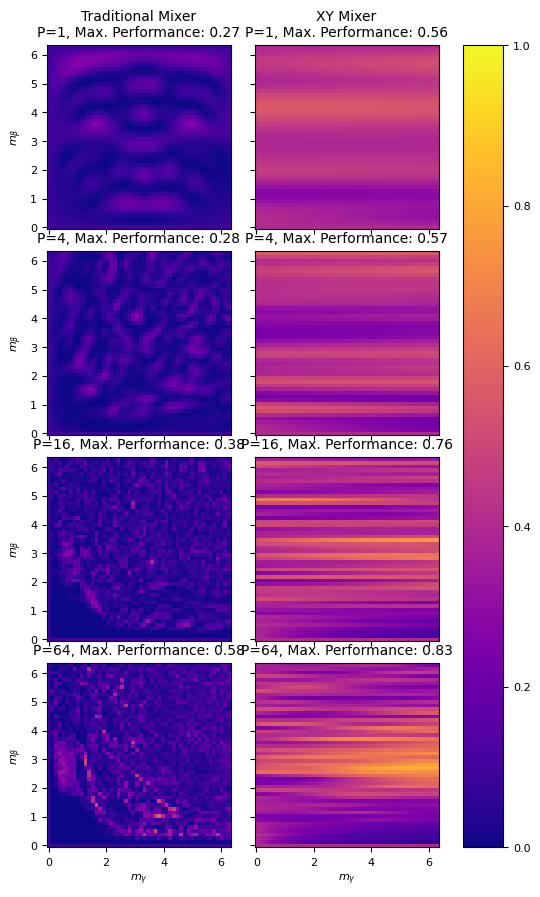

In [9]:
beta_array = np.linspace(0, SUP, GRANULARITY)
gamma_array = np.linspace(0, SUP, GRANULARITY)

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(5.5,8.5), sharex="col", sharey="row")
fig.tight_layout()
for i in range(4):
    cmap = axs[i,0].pcolormesh(beta_array, gamma_array, wt_trad_heatmap[:,:,i], cmap="plasma", vmin=0, vmax=1) 
    axs[i,0].set_box_aspect(1)
    if i==0:
        axs[i,0].set_title(f"Traditional Mixer\nP={circuit_depths[i]}, Max. Performance: {wt_trad_heatmap[:,:,i].max():.2f}", fontsize=10)
    else:
        axs[i,0].set_title(f"P={circuit_depths[i]}, Max. Performance: {wt_trad_heatmap[:,:,i].max():.2f}", fontsize=10)
    axs[i,0].set_ylabel(r"$m_{\beta}$")


for i in range(4):
    cmap = axs[i,1].pcolormesh(beta_array, gamma_array, wt_xy_heatmap[:,:,i], cmap="plasma", vmin=0, vmax=1)
    if i==0:
        axs[i,1].set_title(f"XY Mixer\nP={circuit_depths[i]}, Max. Performance: {wt_xy_heatmap[:,:,i].max():.2f}", fontsize=10)
    else:
        axs[i,1].set_title(f"P={circuit_depths[i]}, Max. Performance: {wt_xy_heatmap[:,:,i].max():.2f}", fontsize=10)
    axs[i,1].set_box_aspect(1)


axs[3,0].set_xlabel("$m_{\gamma}$")
axs[3,1].set_xlabel("$m_{\gamma}$")
fig.colorbar(cmap, ax=axs)
fig.savefig(f'figures/WT{structure_id}_HEATMAP.svg', bbox_inches = "tight")
plt.show(fig)




In [10]:
starting_point_dicts = {}

for mixer, heatmap in zip(["trad", "xy"], [wt_trad_heatmap, wt_xy_heatmap]):
    for i, P in zip([0, 1, 2, 3], [1, 4, 16, 64]):
        a = heatmap[:,:,i]
        indices = np.unravel_index(np.argmax(a, axis=None), a.shape)
        starting_point_dicts[f"{mixer}_{P}"] = [gamma_array[indices[1]], beta_array[indices[0]]]
        print(f"{mixer} - {P} : {a[indices]}")
        
        
starting_point_dicts


file_name = f"startingpoints_wt_{structure_id}" 
with open(f'results/{file_name}.pickle', 'wb') as handle:
    pickle.dump(starting_point_dicts, handle, protocol=pickle.HIGHEST_PROTOCOL)      

trad - 1 : 0.26901372987705696
trad - 4 : 0.27781095774604203
trad - 16 : 0.38186109720893835
trad - 64 : 0.580791396748079
xy - 1 : 0.5611662450842129
xy - 4 : 0.5693970038009286
xy - 16 : 0.7555805587232562
xy - 64 : 0.8251884127229518


In [11]:
starting_point_dicts

{'trad_1': [1.153469387755102, 5.7673469387755105],
 'trad_4': [3.0759183673469392, 4.101224489795919],
 'trad_16': [3.588571428571429, 2.6914285714285717],
 'trad_64': [3.844897959183674, 1.0253061224489797],
 'xy_1': [0.0, 4.229387755102041],
 'xy_4': [2.9477551020408166, 6.28],
 'xy_16': [6.28, 3.4604081632653063],
 'xy_64': [5.3828571428571435, 2.6914285714285717]}